In [1]:
# "This file uses tsfresh to extract basic statistical calculations from the cleaned data 
# from the exploratory analysis file and then seperates the data into clusters."


import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import tsfresh

In [2]:
# Ask Andreas why the imported data from last notebook is not the same 
df = pd.read_csv(r"C:\Users\AliHa\Desktop\Masters Project\main\raw_data\CSV Fridges data.csv")

# Data Cleaning

I have done the necessary data cleaning and extracted only the relevant data

In [3]:
#do the same data changes as the last notebook to make the data useable

df["device_id"] = df["device_id"].astype(int)
df["temperature"] = df["temperature"].apply(lambda x: x.replace(",","."))
df["temperature"] = df["temperature"].astype('float64') 
df["datetime"] = pd.to_datetime(df["datetime"], format = "%d.%m.%Y %H:%M:%S")
df["datetime"].describe()
df = df[["address","temperature","datetime","device_id"]]

count                  515939
unique                 508994
top       2019-07-28 00:27:24
freq                        4
first     2019-01-11 02:04:06
last      2020-01-23 17:55:03
Name: datetime, dtype: object

In [ ]:

df["datetime"] = pd.to_datetime(df["datetime"])

#this is the method I used to give each day a different ID.
periods = df["datetime"].apply(lambda x: pd.Period(x,freq = "D").dayofyear)
year = df["datetime"].apply(lambda x: pd.Period(x,freq = "D").year)


# ID Allocation

I Allocated an ID for each day of data which is the device ID with the day and year appended to it. I then do some studying based on the doy_IDs and drop any days with duplicates

In [5]:
periods
year

0         13
1         13
2         13
3         13
4         13
          ..
515934    13
515935    13
515936    13
515937    13
515938    13
Name: datetime, Length: 515939, dtype: int64

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
515934    2019
515935    2019
515936    2019
515937    2019
515938    2019
Name: datetime, Length: 515939, dtype: int64

In [6]:
df["doy"] = periods
df["year"] = year

In [7]:
df.head()

address  temperature            datetime  device_id  doy  year
0  EFAB97EA9D39         20.3 2019-01-13 04:59:02      31948   13  2019
1  EFAB97EA9D39         20.3 2019-01-13 05:02:01      31948   13  2019
2  EFAB97EA9D39         20.3 2019-01-13 05:05:00      31948   13  2019
3  EFAB97EA9D39         20.3 2019-01-13 05:07:59      31948   13  2019
4  EFAB97EA9D39         20.3 2019-01-13 05:10:58      31948   13  2019

In [8]:
doy_id = df["device_id"].astype("str") + df["doy"].astype("str") + df["year"].astype("str")
doy_id

0         31948132019
1         31948132019
2         31948132019
3         31948132019
4         31948132019
             ...     
515934    31948132019
515935    31948132019
515936    31948132019
515937    31948132019
515938    31948132019
Length: 515939, dtype: object

In [9]:
#Here I created a new df with the relevant columns that I need

dict_temp = {'doy_id':doy_id, "temperature":df["temperature"], "datetime": df["datetime"]}
df_relevant = pd.DataFrame(dict_temp)
df_relevant.head()

doy_id  temperature            datetime
0  31948132019         20.3 2019-01-13 04:59:02
1  31948132019         20.3 2019-01-13 05:02:01
2  31948132019         20.3 2019-01-13 05:05:00
3  31948132019         20.3 2019-01-13 05:07:59
4  31948132019         20.3 2019-01-13 05:10:58

In [10]:
df_relevant["doy_id"].nunique()

1133

In [11]:
df_relevant.sample(20)

doy_id  temperature            datetime
211839  520492562019          4.9 2019-09-13 07:00:14
435970  495893452019          4.9 2019-12-11 19:56:44
354101  494463122019          3.8 2019-11-08 02:21:58
515733   31948122019         20.5 2019-01-12 18:44:28
333520  487903022019          5.3 2019-10-29 19:40:34
159477  520492412019          3.6 2019-08-29 23:33:51
508211   49446202020          6.0 2020-01-20 02:47:28
511136   49446212020          6.0 2020-01-21 19:23:57
145693  494862352019          4.8 2019-08-23 05:39:01
428509  487903422019          5.0 2019-12-08 04:55:13
349502  495893082019          5.3 2019-11-04 09:29:27
459362  494863562019          2.9 2019-12-22 20:37:05
102136  494462232019          5.3 2019-08-11 10:56:16
23441    31948632019         20.3 2019-03-04 20:20:09
211210  520492552019          6.8 2019-09-12 01:10:14
9525     31948342019         21.0 2019-02-03 13:40:50
183419  520402462019          2.4 2019-09-03 04:11:02
320844  495892932019          4.3 2019-10-20 16:50:03
273571  494442642019          6.5 2019-09-21 07:55:09
69587   494462122019          3.8 2019-07-31 13:54:05

In [12]:
#Here I double check that there are no duplicates in the data
df_relevant["doy_id"].value_counts()
df_relevant.drop_duplicates(subset=["doy_id","datetime"], keep="first",inplace=True)
df_relevant["doy_id"].value_counts()

59519152020     966
494462222019    966
59519162020     964
494462232019    912
59519142020     801
               ... 
59519102020      16
495893302019     16
319481262019     11
4958942020        6
319481082019      4
Name: doy_id, Length: 1133, dtype: int64

494462222019    966
59519152020     966
59519162020     964
494462232019    912
59519142020     801
               ... 
495893302019     16
59519102020      16
319481262019     11
4958942020        6
319481082019      4
Name: doy_id, Length: 1133, dtype: int64

In [13]:
#Every run gives 5 random plots, just a check for myself to make sure everything is going well.

random_doy_ids = df_relevant["doy_id"].sample(5)
for random_doy in random_doy_ids:
    df_relevant[df_relevant["doy_id"] == random_doy].plot(x = "datetime",y = "temperature", title=random_doy)

# Tsfresh Minimal feature extraction

I used tsfresh feature extraction to extract the minimal features. This includes basic statistical data like mean,median, std dev, etc.. for each day. I then used kmeans clustering and found that 3 clusters is likely the best number of clusters to use as that avoids overfitting while explains most variation in the data. I also used a covariance matrix to know which 2 features have the least covariance in order to see which the cluster separation.

In [14]:
#Here is the Tsfresh feature extraction. I used the MinimalFCParameters settings to only get the statistical features

settings =  tsfresh.feature_extraction.MinimalFCParameters()
extracted_features = tsfresh.feature_extraction.extract_features(df_relevant, 
                                              column_id = "doy_id",
                                              column_sort = "datetime",
                                              default_fc_parameters=settings,
                                              column_value = "temperature")

Feature Extraction: 100%|██████████| 30/30 [00:02<00:00, 12.19it/s]


In [15]:
extracted_features
extracted_features.columns
extracted_features = extracted_features.drop(columns = "temperature__length")

temperature__sum_values  temperature__median  temperature__mean  \
319481002019                   3308.3                 6.75           6.863693   
319481012019                   3093.7                 6.40           6.431809   
319481022019                   3038.4                 6.30           6.290683   
319481032019                   3092.8                 6.40           6.416598   
319481042019                   3092.8                 6.40           6.403313   
...                               ...                  ...                ...   
59519152020                    1563.2                 1.60           1.618219   
59519162020                    1536.8                 1.60           1.594191   
59519172020                     935.2                 1.60           1.595904   
59519182020                    1406.3                 2.80           3.132071   
59519192020                     761.6                 1.80           2.115556   

              temperature__length  temperature__standard_deviation  \
319481002019                482.0                         0.356314   
319481012019                481.0                         0.271912   
319481022019                483.0                         0.230078   
319481032019                482.0                         0.192425   
319481042019                483.0                         0.165907   
...                           ...                              ...   
59519152020                 966.0                         0.066558   
59519162020                 964.0                         0.062846   
59519172020                 586.0                         0.513653   
59519182020                 449.0                         0.633543   
59519192020                 360.0                         0.780336   

              temperature__variance  temperature__maximum  \
319481002019               0.126960                   7.6   
319481012019               0.073936                   7.1   
319481022019               0.052936                   7.0   
319481032019               0.037027                   7.0   
319481042019               0.027525                   6.8   
...                             ...                   ...   
59519152020                0.004430                   1.8   
59519162020                0.003950                   1.8   
59519172020                0.263840                   6.2   
59519182020                0.401377                   4.5   
59519192020                0.608925                   4.1   

              temperature__minimum  
319481002019                   6.3  
319481012019                   5.9  
319481022019                   6.0  
319481032019                   6.1  
319481042019                   6.1  
...                            ...  
59519152020                    1.5  
59519162020                    1.5  
59519172020                    0.7  
59519182020                    2.3  
59519192020                    1.5  

[1133 rows x 8 columns]

Index(['temperature__sum_values', 'temperature__median', 'temperature__mean',
       'temperature__length', 'temperature__standard_deviation',
       'temperature__variance', 'temperature__maximum',
       'temperature__minimum'],
      dtype='object')

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
#this is the standard scaler used for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(extracted_features)

In [18]:
scaled_features[:5]

array([[ 0.25054107,  0.14291015,  0.15471253, -0.49446933, -0.26476978,
        -0.12776875,  0.35437594],
       [ 0.14987906,  0.06720748,  0.06091092, -0.5876513 , -0.27524513,
        -0.21616762,  0.26463846],
       [ 0.12393959,  0.04557814,  0.03025964, -0.63383709, -0.27939395,
        -0.2338474 ,  0.28707283],
       [ 0.1494569 ,  0.06720748,  0.05760717, -0.67540703, -0.28253685,
        -0.2338474 ,  0.3095072 ],
       [ 0.1494569 ,  0.06720748,  0.0547218 , -0.70468329, -0.2844141 ,
        -0.26920695,  0.3095072 ]])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=1,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=6,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=7,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=8,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=9,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

([<matplotlib.axis.XTick at 0x1adc00bff88>,
 <a list of 10 Text xticklabel objects>)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

<function matplotlib.pyplot.show(*args, **kw)>

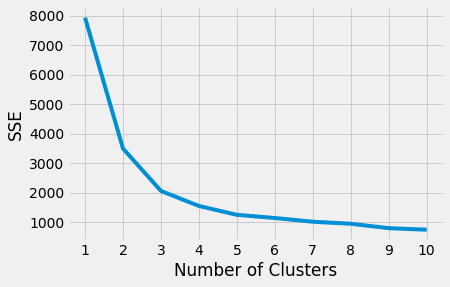

In [19]:
from matplotlib import pyplot as plt
kmeans_kwargs = {
    "init":"random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show

In [20]:
#I used a simple KMeans clustering with 3 clusters.

kmeans = KMeans(init = "random",
               n_clusters = 3,
               n_init = 10,
               random_state = 42
               )

In [21]:
kmeans.fit(scaled_features)
kmeans.inertia_
kmeans.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

2056.288331186288

array([[ 3.45555508e-01,  4.67041171e-01,  6.40107526e-01,
         4.24043744e+00,  4.40984170e+00,  2.22061044e+00,
        -3.70574742e-01],
       [-2.57257063e-01, -2.70772076e-01, -2.76140503e-01,
        -1.62622648e-01, -1.51599682e-01, -2.86574725e-01,
        -2.36021929e-01],
       [ 3.20907387e+00,  3.33129586e+00,  3.32384038e+00,
         2.23843471e-01,  3.68225863e-03,  2.75108787e+00,
         3.25272415e+00]])

In [22]:
kmeans_2 = KMeans(init = "random",
               n_clusters = 2,
               n_init = 10,
               random_state = 42
               )
kmeans_2.fit(scaled_features)
kmeans_2.inertia_
kmeans_2.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

3493.108954971837

array([[ 3.09765192,  3.21465287,  3.21348281,  0.65945743,  0.50030207,
         2.7665748 ,  3.01519673],
       [-0.25443941, -0.26404981, -0.2639537 , -0.05416747, -0.04109453,
        -0.22724492, -0.24766659]])

In [23]:
df_relevant[df_relevant["doy_id"] == "4948632020"].head

<bound method NDFrame.head of             doy_id  temperature            datetime
467587  4948632020          4.0 2020-01-03 00:02:14
467588  4948632020          4.0 2020-01-03 00:05:13
467589  4948632020          4.0 2020-01-03 00:08:12
467590  4948632020          4.0 2020-01-03 00:11:11
467591  4948632020          4.0 2020-01-03 00:14:10
...            ...          ...                 ...
469583  4948632020          4.0 2020-01-03 23:47:36
469584  4948632020          4.0 2020-01-03 23:50:35
469585  4948632020          4.0 2020-01-03 23:53:34
469586  4948632020          4.0 2020-01-03 23:56:33
469587  4948632020          4.0 2020-01-03 23:59:32

[482 rows x 3 columns]>

Text(0, 0.5, 'Temperature')

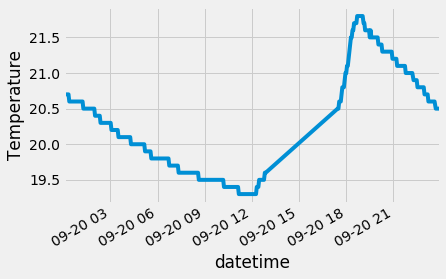

In [24]:
df_relevant[df_relevant["doy_id"] == "521482632019"].plot(x="datetime",y="temperature")
plt.ylabel("Temperature")
plt.legend().remove()
plt.savefig("Actual_data.pdf",bbox_inches='tight')

Text(0.5, 0, 'Index number')

Text(0, 0.5, 'Temperature')

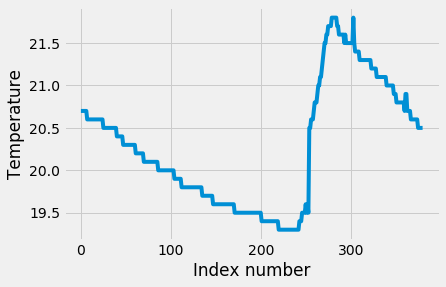

In [25]:
#Nice example of how tsfresh works with data
plt.xlabel("Index number")
plt.ylabel("Temperature")
plt.plot(df_relevant[df_relevant["doy_id"] == "521482632019"].temperature.values)

plt.savefig("tsfresh_read_in.pdf", bbox_inches='tight')

In [26]:
value_counts = df_relevant["doy_id"].value_counts()
value_counts.to_csv("value_counts.csv")

C:\Python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [27]:
# TO DO: Check last weeks notebook.
# Make sure no duplicates are formed. DONE
# Write  method that will be used to remove gaps from the data. 
# Label clusters

In [28]:
# Make sure no duplicates are formed.
#df_relevant[df_relevant["doy_id"] == "494462222019"].to_csv(r"C:\Users\AliHa\Desktop\Masters Project\main\clean_data\Duplicate_check_1.csv")
#df_relevant[df_relevant["doy_id"] == "59519152020"].to_csv(r"C:\Users\AliHa\Desktop\Masters Project\main\clean_data\Duplicate_check_2.csv")

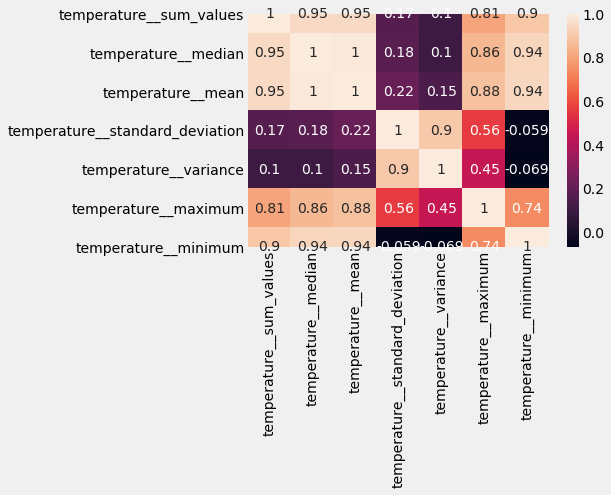

In [29]:
import seaborn as sn
scaled_df = pd.DataFrame(scaled_features, columns = extracted_features.columns)
covMatrix = pd.DataFrame.cov(scaled_df)
sn.heatmap(covMatrix,annot=True)

In [30]:
abs(covMatrix).min().min()
covMatrix

0.05879361780813429

temperature__sum_values  temperature__median  \
temperature__sum_values                         1.000883             0.949398   
temperature__median                             0.949398             1.000883   
temperature__mean                               0.949294             0.996614   
temperature__standard_deviation                 0.170862             0.179463   
temperature__variance                           0.103618             0.100976   
temperature__maximum                            0.808260             0.857064   
temperature__minimum                            0.897310             0.941487   

                                 temperature__mean  \
temperature__sum_values                   0.949294   
temperature__median                       0.996614   
temperature__mean                         1.000883   
temperature__standard_deviation           0.215871   
temperature__variance                     0.147502   
temperature__maximum                      0.880099   
temperature__minimum                      0.944800   

                                 temperature__standard_deviation  \
temperature__sum_values                                 0.170862   
temperature__median                                     0.179463   
temperature__mean                                       0.215871   
temperature__standard_deviation                         1.000883   
temperature__variance                                   0.903289   
temperature__maximum                                    0.562122   
temperature__minimum                                   -0.058794   

                                 temperature__variance  temperature__maximum  \
temperature__sum_values                       0.103618              0.808260   
temperature__median                           0.100976              0.857064   
temperature__mean                             0.147502              0.880099   
temperature__standard_deviation               0.903289              0.562122   
temperature__variance                         1.000883              0.446048   
temperature__maximum                          0.446048              1.000883   
temperature__minimum                         -0.069224              0.743517   

                                 temperature__minimum  
temperature__sum_values                      0.897310  
temperature__median                          0.941487  
temperature__mean                            0.944800  
temperature__standard_deviation             -0.058794  
temperature__variance                       -0.069224  
temperature__maximum                         0.743517  
temperature__minimum                         1.000883

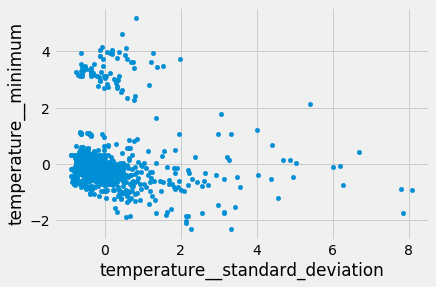

In [31]:
scaled_df.plot.scatter(x="temperature__standard_deviation", y="temperature__minimum")

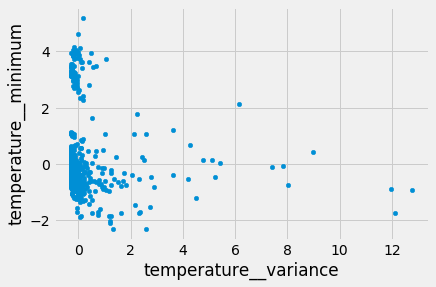

In [32]:
scaled_df.plot.scatter(x="temperature__variance", y="temperature__minimum")

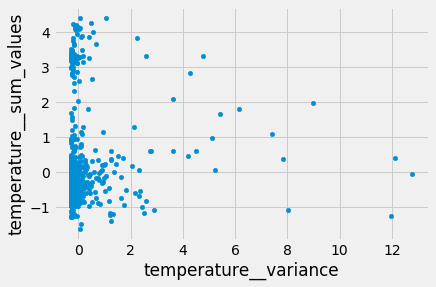

In [33]:
scaled_df.plot.scatter(x="temperature__variance", y="temperature__sum_values")